데이터 전처리 (Data Preprocessing)
==============================
- ML의 모든 알고리즘은 어떤 데이터를 사용하느냐가 중요하다.   

    > Garbage In, Garbage Out   
       
    - Null 값을 어떻게 처리할 것인가?   
        * 단순히 평균값 대체를 하는 경우 왜곡이 심할 수 있다. (피처의 중요도가 높을 때 피처의 평균으로 대처하는 경우)  
   
    - 사이킷런의 ML 알고리즘은 문자열 값을 입력값으로 허용하지 않는다.   
        + 문자형 값은 인코딩해서 숫자 형으로 변환해야 한다.  
        - 불필요한 피처의 경우 삭제하는게 더 좋다.   

데이터 인코딩
=========
- 레이블 인코딩(Label encoding)   
    - 카테고리 피처를 코드형 숫자 값으로 변환   
        - ex) 코딩 프로그램 목록이 C, Python, Java, R이 있다고 할 때 -> C : 1, Python : 2, Java : 3, R : 4   
   
- 원-핫 인코딩(One Hot encoding)   
    - 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식   

In [33]:
# label 인코딩 예시
from sklearn.preprocessing import LabelEncoder

items = ['Python', 'Java', 'C++', 'Python', 'C', 'R', 'Java']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('encoding converted values:', labels)

encoding converted values: [3 2 1 3 0 4 2]


In [34]:
# 데이터가 많은 경우
print('encoding classes: ', encoder.classes_)
# 0번부터 4번까지의 인덱스를 가지고 있음

encoding classes:  ['C' 'C++' 'Java' 'Python' 'R']


In [35]:
# Decoding
print('decoding original values:', encoder.inverse_transform([1, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4]))

decoding original values: ['C++' 'Java' 'C' 'C++' 'Python' 'R' 'Java' 'C' 'C++' 'Python' 'R']


#### 주의할 점   
- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리로 변환하는 것이다.   
- 그런데, 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 있다.  (1과 2의 차이가 정말 차이가 있는게 맞는것일가?)   
- 숫자 값에 따른 순서나 중요도로 인식이 될 수 있기에, 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 한다.   
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩에 별 문제가 없다.

### 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 방식

In [36]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['Python', 'Java', 'C++', 'Python', 'C', 'R', 'Java']

#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
원-핫 인코딩 데이터 차원
(7, 5)


각 언어는 해당 언어에 맞는 위치에서 1을 가지고, 나머지 위치에서는 0을 가진다.   
- 'Python' → [0, 0, 0, 1, 0] (네 번째 위치가 1)   
- 'Java' → [0, 0, 1, 0, 0] (세 번째 위치가 1)   
- 'C++' → [0, 1, 0, 0, 0] (두 번째 위치가 1)   
- 'C' → [1, 0, 0, 0, 0] (첫 번째 위치가 1)   
- 'R' → [0, 0, 0, 0, 1] (다섯 번째 위치가 1)   

In [37]:
import pandas as pd

df_1 = pd.DataFrame({'item': ['Python', 'Java', 'C++', 'Python', 'C', 'R', 'Java']})
df_1

,item
0,Python
1,Java
2,C++
3,Python
4,C
5,R
6,Java


In [38]:
pd.get_dummies(df_1).astype(int) # 원핫인코딩 바로 사용 가능

,item_C,item_C++,item_Java,item_Python,item_R
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,0,0,1
6,0,0,1,0,0


In [39]:
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
df_sns= df[['sex','embarked','class']]

In [41]:
import pandas as pd
df_1= pd.get_dummies(df_sns).astype(int)

In [42]:
df_tt=pd.concat([df,df_1],axis=1)#깔끔한 하나의 숫자로 완성된 데이터프레임을 만들 수 있다!
df_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,0,1,0,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,1,0,0,0,1,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,1,0,0,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,0,1,1,0,0,1,0,0


## 피처 스케일링과 정규화
### 피처 스케일링(feature scaling) 
#### 표준화(Standardization), 정규화(Normalization)

- 표준화는 데이터의 피처 각각이 평균이 0 이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 새로운 x의 값은 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산

## StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환 
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우신 반포 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [43]:
from sklearn.datasets import load_iris
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [44]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- StandardScaler 객체를 생성 후에 fit()과 trnasform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환
- transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값 분산값 다시 확인!

In [45]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변화노딘 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


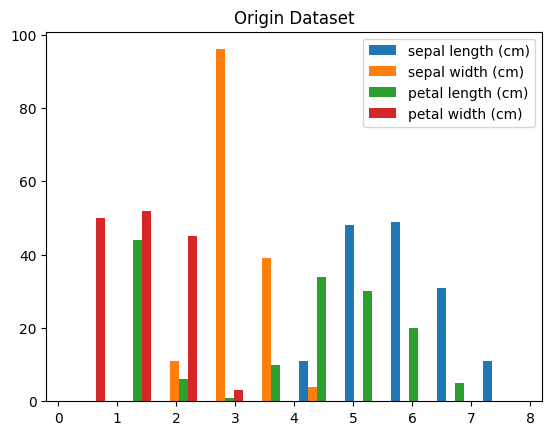

In [46]:
iris_df_standarded= (iris_df - iris_df.mean())/iris_df.std()

plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

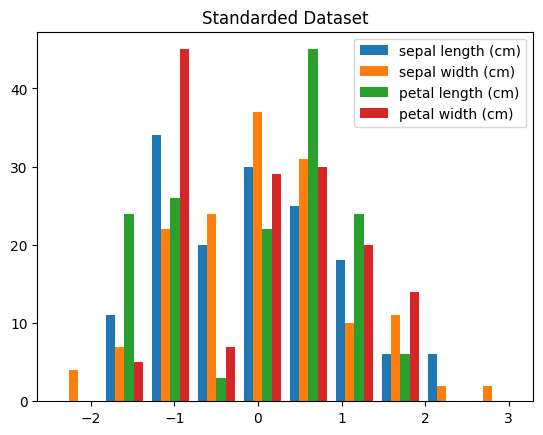

In [47]:
plt.title('Standarded Dataset')
plt.hist(iris_df_standarded)
plt.legend(iris_df_scaled.columns)

- 모든 컬럼 값의 평균이 0에 아주 까가운 값으로, 분산은 1에 아주 까가운 값으로 변환

## MinMaxScaler
- 데이터 값을 0과 1사이의 범위 값으로 변환 (음수 값이면 -1에서 1값으로 변환)
- 데이터 분포가 가우시안 분포가 아닌 경우에 Min,Max Scale을 적용
- 분류보다 회귀에 유용

In [48]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


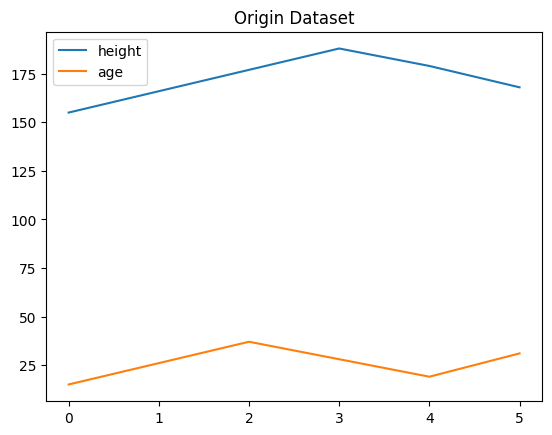

In [49]:
df = pd.DataFrame([[155, 15],
                  [166, 26],
                  [177, 37],
                  [188, 28],
                  [179, 19],
                  [168, 31],])
df.columns = ['height', 'age']
df_new = (df - df.min())/(df.max() - df.min())

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)



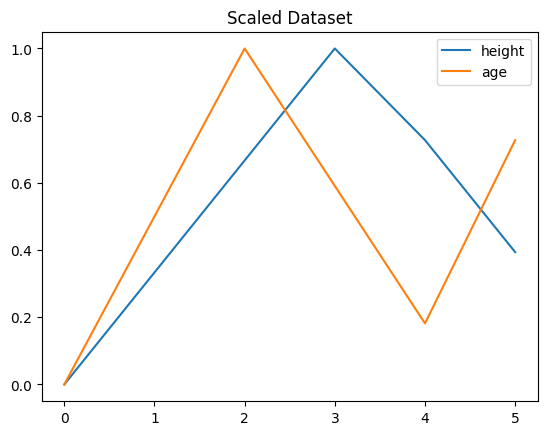

In [50]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

- 모든 피처에 0에서 1사이의 값으로 변환되는 스케일링 적용

# MaxAbsScaler()
- 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
- 즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같다.
- 이상치에 매우 민감

In [51]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = maxabs_scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
#X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


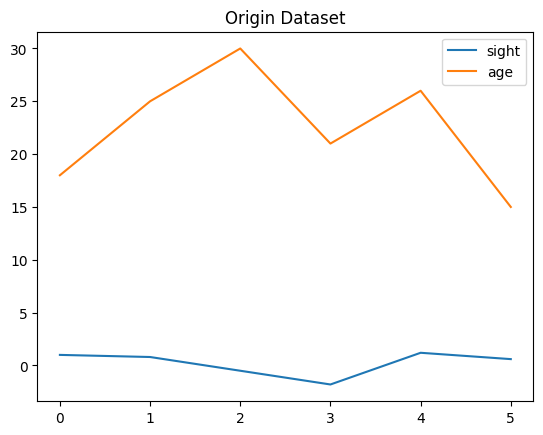

In [52]:
df = pd.DataFrame([[1.0, 18],
                  [0.8, 25],
                  [-0.5, 30],
                  [-1.8, 21],
                  [1.2, 26],
                  [0.6, 15]])
df.columns = ['sight', 'age']
df_new = df/df.abs().max()

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

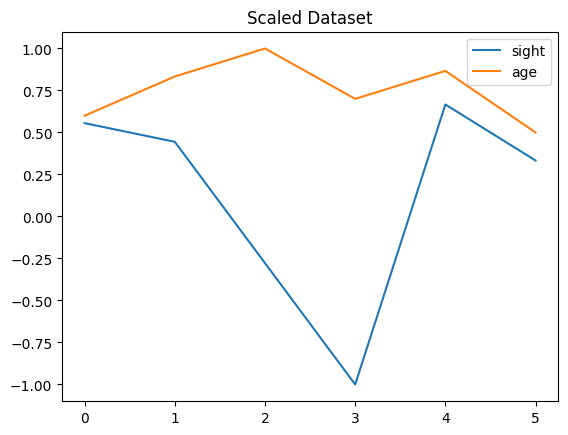

In [53]:

plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

# RobustScaler()
- 평균과 분산 대신에 중간 값과 사분위 값을 사용한다.
- 중간 값은 정렬시 중간에 있는 값을 의미하고
- 사분위값은 1/4, 3/4에 위치한 값을 의미한다.
- 이상치 영향을 최소화할 수 있다.

In [54]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = robust_scaler.transform(iris_df)

# 테스트 데이터의 스케일링
#X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)


#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


# Normalizer()
- 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행된다.
- 그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식이다.
- 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링한다.
- 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
- 모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
- 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않는다.

In [57]:
from sklearn.preprocessing import Normalizer

# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련데이터의 모수 분포 저장
normal_scaler.fit(iris_df)

# 훈련 데이터 스케일링
X_train_scaled = normal_scaler.transform(iris_df)
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())
# 테스트 데이터의 스케일링
#X_test_scaled = normal_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


## 변수구간화
- 데이터가 연속형으로 데이터에 대해서 범주형 변수로 구간을 나눠서 데이터를 구간화 작업한다.
- 대표적으로 나이-> 0~100세 나이를 유아, 청소년, 청년, 중장년, 노인 등등 나눌 수 있다.

- 이산 값 -> 평활화 하는 방식으로 진행할 수도 있다.
- 연속적인 값도 구간화로 사용할 수 있다.

In [58]:
data = pd.DataFrame({'age':[11,22,33,44,55,51,42,33,24,15]})

## 구간화 나누기
bins = [0, 15, 35, 60] #구간 경계 설정 
labels = ['Child','Youth','Adult']

## 구간화 진행
data['age_group']=pd.cut(data['age'], bins= bins, labels = labels)

In [59]:
## pd.qcut 
## 데이터의 분포를 고려하여 구간을 나눈다.


data = pd.DataFrame({'age':[11,22,33,44,55,51,42,33,24,15]})

data['age_group_qcut']=pd.qcut(data['age'],q=2,labels = ['Child','Youth'])

In [60]:
## numpy 도 가능하다.
## np.digitize
import numpy as np
data =np.array([1.5, 2.5, 3.6 ,4.8 ,0.7 ,6.5])

#bins 구간 경계설정

bins = [0,2,4,6,8]

bins_indices=np.digitize(data, bins)

In [61]:
bins_indices

array([1, 2, 2, 3, 1, 4])